# Flexible Process Planning (FPP) -- completion time minimization

#### Reference: Luo K, Sun J, Guo L. Network-based integer programming models for flexible process planning[J]. International Journal of Production Research, 2022: 1-15.

In [13]:
# Define the specification class
class Specification:
    def __init__(self, machine, tool, direction, time):
        self.machine = machine
        self.tool = tool
        self.direction = direction
        self.time = time

### Example

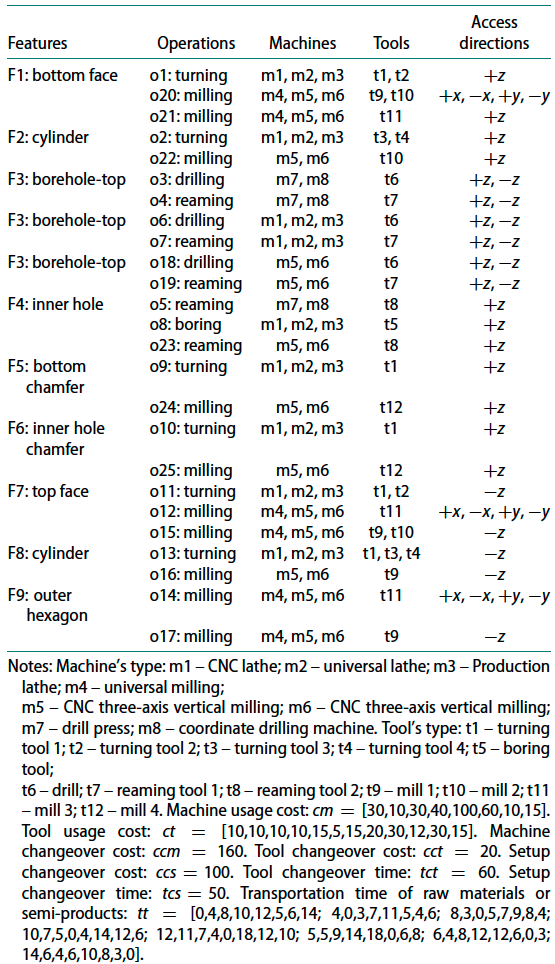

In [14]:
# Input the Example
CM = {'m1': 30, 'm2': 10, 'm3': 30, 'm4': 40, 'm5': 100, 'm6': 60, 'm7': 10, 'm8': 15}  # machine usage cost
CT = {'t1': 10, 't2': 10, 't3': 10, 't4': 10, 't5': 15, 't6': 5, 't7': 15, 't8': 20, 't9': 30, 't10': 12, 't11': 30, 't12': 15}  # tool usage cost
ccm = 160  # machine changeover cost
cct = 20  # tool changeover cost
ccs = 100  # setup changeover cost
tct = 60  # tool changeover time
tcs = 50  # setup changeover time
tt = [
    [0, 4, 8, 10, 12, 5, 6, 14],
    [4, 0, 3, 7, 11, 5, 4, 6],
    [8, 3, 0, 5, 7, 9, 8, 4],
    [10, 7, 5, 0, 4, 14, 12, 6],
    [12, 11, 7, 4, 0, 18, 12, 10],
    [5, 5, 9, 14, 18, 0, 6, 8],
    [6, 4, 8, 12, 12, 6, 0, 3],
    [14, 6, 4, 6, 10, 8, 3, 0]
]  # transportation time, tt[i][j] indicates the transportation time from machine i to machine j
features = {
    1: ['o1', 'o20', 'o21'],
    2: ['o2', 'o22'],
    3: ['o3', 'o4', 'o6', 'o7', 'o18', 'o19'],
    4: ['o5', 'o8', 'o23'],
    5: ['o9', 'o24'],
    6: ['o10', 'o25'],
    7: ['o11', 'o12', 'o15'],
    8: ['o13', 'o16'],
    9: ['o14', 'o17'],
}
s1 = Specification(['m1', 'm2', 'm3'], ['t1', 't2'], ['+z'], [2.3, 3.3, 4.6, 6.5, 3.8, 5.5])
s2 = Specification(['m4', 'm5', 'm6'], ['t9', 't10'], ['+x', '-x', '+y', '-y'], [2.7, 2.8, 2.9, 2.4, 2.9, 2.4])
s3 = Specification(['m4', 'm5', 'm6'], ['t11'], ['+z'], [5.7, 4.2, 2.8])
s4 = Specification(['m1', 'm2', 'm3'], ['t3', 't4'], ['+z'], [1.2, 1.0, 1.9, 1.5, 2.0, 1.6])
s5 = Specification(['m5', 'm6'], ['t10'], ['+z'], [3.1, 3.2])
s6 = Specification(['m7', 'm8'], ['t6'], ['+z', '-z'], [5.5, 3.8])
s7 = Specification(['m7', 'm8'], ['t7'], ['+z', '-z'], [54.8, 38.1])
s8 = Specification(['m1', 'm2', 'm3'], ['t6'], ['+z', '-z'], [3.3, 4.8, 3.3])
s9 = Specification(['m1', 'm2', 'm3'], ['t7'], ['+z', '-z'], [13.4, 26.6, 30.2])
s10 = Specification(['m5', 'm6'], ['t6'], ['+z', '-z'], [3.3, 3.4])
s11 = Specification(['m5', 'm6'], ['t7'], ['+z', '-z'], [10.7, 24.1])
s12 = Specification(['m7', 'm8'], ['t8'], ['+z'], [34.3, 13.7])
s13 = Specification(['m1', 'm2', 'm3'], ['t5'], ['+z'], [1.1, 1.5, 1.8])
s14 = Specification(['m5', 'm6'], ['t8'], ['+z'], [30.2, 13.4])
s15 = Specification(['m1', 'm2', 'm3'], ['t1'], ['+z'], [0.6, 0.7, 0.8])
s16 = Specification(['m5', 'm6'], ['t12'], ['+z'], [0.4, 0.5])
s17 = Specification(['m1', 'm2', 'm3'], ['t1'], ['+z'], [0.7, 0.8, 0.9])
s18 = Specification(['m5', 'm6'], ['t12'], ['+z'], [0.5, 0.6])
s19 = Specification(['m1', 'm2', 'm3'], ['t1', 't2'], ['-z'], [2.3, 3.3, 4.6, 6.5, 3.8, 5.5])
s20 = Specification(['m4', 'm5', 'm6'], ['t11'], ['+x', '-x', '+y', '-y'], [5.7, 4.2, 2.8])
s21 = Specification(['m4', 'm5', 'm6'], ['t9', 't10'], ['-z'], [2.7, 2.8, 2.9, 2.4, 2.8, 2.5])
s22 = Specification(['m1', 'm2', 'm3'], ['t1', 't3', 't4'], ['-z'], [0.5, 0.7, 0.4, 1.0, 1.4, 0.8, 0.8, 1.1, 0.7])
s23 = Specification(['m5', 'm6'], ['t9'], ['-z'], [4.6, 7.2])
s24 = Specification(['m4', 'm5', 'm6'], ['t11'], ['+x', '-x', '+y', '-y'], [10.8, 9.7, 7.4])
s25 = Specification(['m4', 'm5', 'm6'], ['t9'], ['-z'], [4.3, 3.5, 6.8])
specifications = {'o1': s1, 'o20': s2, 'o21': s3, 'o2': s4, 'o22': s5, 'o3': s6, 'o4': s7, 'o6': s8, 'o7': s9, 'o18': s10, 'o19': s11, 'o5': s12, 'o8': s13, 'o23': s14, 'o9': s15, 'o24': s16, 'o10': s17, 'o25': s18, 'o11': s19, 'o12': s20, 'o15': s21, 'o13': s22, 'o16': s23, 'o14': s24, 'o17': s25}

### The AND/OR-network of the example

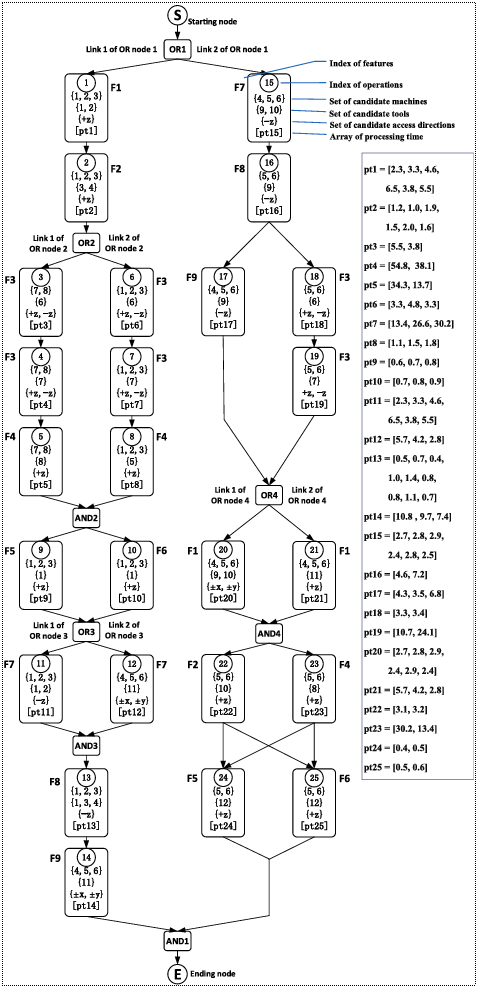

In [15]:
# Input the AND/OR-network
and_or_network = {
    's': ['o1', 'o15'],
    'o1': ['o2'],
    'o2': ['o3', 'o6'],
    'o3': ['o4'],
    'o4': ['o5'],
    'o5': ['o9', 'o10'],
    'o6': ['o7'],
    'o7': ['o8'],
    'o8': ['o9', 'o10'],
    'o9': ['o11', 'o12'],
    'o10': ['o11', 'o12'],
    'o11': ['o13'],
    'o12': ['o13'],
    'o13': ['o14'],
    'o14': ['d'],
    'o15': ['o16'],
    'o16': ['o17', 'o18'],
    'o17': ['o20', 'o21'],
    'o18': ['o19'],
    'o19': ['o20', 'o21'],
    'o20': ['o22', 'o23'],
    'o21': ['o22', 'o23'],
    'o22': ['o24', 'o25'],
    'o23': ['o24', 'o25'],
    'o24': ['d'],
    'o25': ['d'],
    'd': [],
}
or_connector = [
    [['o1', 'o2', 'o3', 'o4', 'o5', 'o6', 'o7', 'o8', 'o9', 'o10', 'o11', 'o12', 'o13', 'o14'], ['o15', 'o16', 'o17', 'o18', 'o19', 'o20', 'o21', 'o22', 'o23', 'o24', 'o25']],
    [['o3', 'o4', 'o5'], ['o6', 'o7', 'o8']],
    [['o11'], ['o12']],
    [['o20'], ['o21']],
]

In [16]:
# Define parameters
operations = list(and_or_network.keys())
operations.remove('s')
operations.remove('d')
machines = list(CM.keys())
tools = list(CT.keys())
directions = ['+x', '-x', '+y', '-y', '+z', '-z']
no = len(operations)  # the number of operations
nm = len(machines)  # the number of machines
nt = len(tools)  # the number of tools
nd = len(directions)  # the number of directions
nr = len(or_connector)  # the number of OR-connectors

In [17]:
# Index operations, machines, tools, and directions
o_ind = {}  # the index of operations
m_ind = {}  # the index of machines
t_ind = {}  # the index of tools
d_ind = {}  # the index of directions
for i in range(no):
    o_ind[operations[i]] = i
for i in range(nm):
    m_ind[machines[i]] = i
for i in range(nt):
    t_ind[tools[i]] = i
for i in range(len(directions)):
    d_ind[directions[i]] = i

In [18]:
# Define sets
import numpy as np
M = []  # M[i] is the set of machines available for the ith operation 
T = []  # T[i] is the set of tools available for the ith operation
D = []  # D[i] is the set of toll access directions available for the ith operation
P = []  # the set of operational precedence relationship pairs
w = np.zeros((no, nr, 2))
pt = np.zeros((no, nm, nt))  # pt[i][m][t] is the processing time of the ith operation on the mth machine using the tth tool

for _ in range(no):
    M.append(set())
    T.append(set())
    D.append(set())

for op in specifications.keys():
    op_ind = o_ind[op]
    for m in specifications[op].machine:
        mi = m_ind[m]
        M[op_ind].add(mi)
    for t in specifications[op].tool:
        ti = t_ind[t]
        T[op_ind].add(ti)
    for d in specifications[op].direction:
        di = d_ind[d]
        D[op_ind].add(di)
        
P = [
    [1, 2], [1, 3], [1, 6], [1, 4], [1, 7], [1, 5], [1, 8], [1, 9], [1, 10], [1, 11], [1, 12], [1, 13], [1, 14],
    [2, 3], [2, 6], [2, 4], [2, 7], [2, 5], [2, 8], [2, 9], [2, 10], [2, 11], [2, 12], [2, 13], [2, 14],
    [3, 4], [3, 5], [3, 9], [3, 10], [3, 11], [3, 12], [3, 13], [3, 14],
    [4, 5], [4, 9], [4, 10], [4, 11], [4, 12], [4, 13], [4, 14],
    [5, 9], [5, 10], [5, 11], [5, 12], [5, 13], [5, 14],
    [6, 7], [6, 8], [6, 9], [6, 10], [6, 11], [6, 12], [6, 13], [6, 14],
    [7, 8], [7, 9], [7, 10], [7, 11], [7, 12], [7, 13], [7, 14],
    [8, 9], [8, 10], [8, 11], [8, 12], [8, 13], [8, 14],
    [9, 11], [9, 12], [9, 13], [9, 14],
    [10, 11], [10, 12], [10, 13], [10, 14],
    [11, 13], [11, 14],
    [12, 13], [12, 14],
    [13, 14],
    [15, 16], [15, 17], [15, 18], [15, 19], [15, 20], [15, 21], [15, 22], [15, 23], [15, 24], [15, 25],
    [16, 17], [16, 18], [16, 19], [16, 20], [16, 21], [16, 22], [16, 23], [16, 24], [16, 25],
    [17, 20], [17, 21], [17, 22], [17, 23], [17, 24], [17, 25],
    [18, 19], [18, 20], [18, 21], [18, 22], [18, 23], [18, 24], [18, 25],
    [19, 20], [19, 21], [19, 22], [19, 23], [19, 24], [19, 25],
    [20, 22], [20, 23], [20, 24], [20, 25],
    [21, 22], [21, 23], [21, 24], [21, 25],
    [22, 24], [22, 25],
    [23, 24], [23, 25]
]
for item in P:
    item[0] -= 1
    item[1] -= 1
    
for i in range(no):
    op = operations[i]
    for j in range(nr):
        for k in range(2):
            if op in or_connector[j][k]:
                w[i, j, k] = 1
                
for key in specifications.keys():
    operation_ind = o_ind[key]
    item = specifications[key]
    for i in range(len(item.machine)):
        machine = item.machine[i]
        machine_ind = m_ind[machine]
        for j in range(len(item.tool)):
            tool = item.tool[j]
            tool_ind = t_ind[tool]
            ind = i * len(item.tool) + j
            time = item.time[ind]
            pt[operation_ind, machine_ind, tool_ind] = time

In [19]:
# Create optimization model
from docplex.mp.model import Model
fpp_model = Model(name='FPP')

In [20]:
# Define decision variables
s = fpp_model.binary_var_list(no, name='s')
zeta = fpp_model.binary_var_matrix(len(or_connector), 2, name='zeta')
u = fpp_model.binary_var_matrix(no, no, name='u')
x = fpp_model.binary_var_matrix(no, nm, name='x')
y = fpp_model.binary_var_matrix(no, nt, name='y')
z = fpp_model.binary_var_matrix(no, nd, name='z')
xi = fpp_model.binary_var_cube(no, nm, nt, name='xi')
beta = fpp_model.binary_var_list(no, name='beta')
gamma = fpp_model.binary_var_list(no, name='gamma')
p = fpp_model.integer_var_list(no, lb=0, ub=no, name='p')
tau = fpp_model.continuous_var_list(no, lb=0, name='tau')

In [21]:
# Define constraints
# Eq.(1)
eq1 = (s[i] >= 1 + sum(w[i, r, l] * (zeta[r, l] - 1) for r in range(nr) for l in range(2)) for i in range(no))
c1 = fpp_model.add_constraints(eq1, names='eq1')

# Eq.(2)
eq2 = (sum(zeta[r, l] for l in range(2)) == 1 for r in range(nr))
c2 = fpp_model.add_constraints(eq2, names='eq2')

# Eq.(3)
eq3 = (p[i] <= no * s[i] for i in range(no))
c3 = fpp_model.add_constraints(eq3, names='eq3')

# Eq.(4)
eq4 = (p[i] <= sum(s) - 1 for i in range(no))
c4 = fpp_model.add_constraints(eq4, names='eq4')

# Eq.(5)
eq5 = (p[i] - p[j] <= no * (2 - s[i] - s[j]) - 1 for [i, j] in P)
c5 = fpp_model.add_constraints(eq5, names='eq5')

# Eq.(6)
eq6 = (p[i] - p[j] <= no * (1 - u[i, j]) - 1 for i in range(no) for j in range(no) if i != j)
c6 = fpp_model.add_constraints(eq6, names='eq6')

# Eq.(7)
eq7 = (sum(u[i, j] for j in range(no) if j != i) <= s[i] for i in range(no))
c7 = fpp_model.add_constraints(eq7, names='eq7')

# Eq.(8)
eq8 = (sum(u[i, j] for i in range(no) if i != j) <= s[j] for j in range(no))
c8 = fpp_model.add_constraints(eq8, names='eq8')

# Eq.(9)
eq9 = (sum(u[i, j] for i in range(no) for j in range(no) if i != j) == sum(s) - 1)
c9 = fpp_model.add_constraint(eq9, ctname='eq9')

# Eq.(10)
eq10 = (sum(x[i, m] for m in M[i]) == s[i] for i in range(no))
c10 = fpp_model.add_constraints(eq10, names='eq10')

# Eq.(11)
eq11 = (sum(y[i, t] for t in T[i]) == s[i] for i in range(no))
c11 = fpp_model.add_constraints(eq11, names='eq11')

# Eq.(12)
eq12 = (sum(z[i, d] for d in D[i]) == s[i] for i in range(no))
c12 = fpp_model.add_constraints(eq12, names='eq12')

# Eq.(21)
eq21 = (sum(y[i, t] for t in (T[i] - T[j])) + sum(y[j, t] for t in (T[j] - T[i])) + sum(t * (y[i, t] - y[j, t]) for t in (T[i] & T[j])) <= (1 + nt) * (1 - u[i, j] + beta[i]) for i in range(no) for j in range(no) if i != j)
c21 = fpp_model.add_constraints(eq21, names='eq21')

# Eq.(22)
eq22 = (sum(y[i, t] for t in (T[i] - T[j])) + sum(y[j, t] for t in (T[j] - T[i])) + sum(t * (y[j, t] - y[i, t]) for t in (T[i] & T[j])) <= (1 + nt) * (1 - u[i, j] + beta[i]) for i in range(no) for j in range(no) if i != j)
c22 = fpp_model.add_constraints(eq22, names='eq22')

# Eq.(23)
eq23 = (sum(z[i, d] for d in (D[i] - D[j])) + sum(z[j, d] for d in (D[j] - D[i])) + sum(d * (z[i, d] - z[j, d]) for d in (D[i] & D[j])) <= (1 + nd) * (1 - u[i, j] + gamma[i]) for i in range(no) for j in range(no) if i != j)
c23 = fpp_model.add_constraints(eq23, names='eq23')

# Eq.(24)
eq24 = (sum(z[i, d] for d in (D[i] - D[j])) + sum(z[j, d] for d in (D[j] - D[i])) + sum(d * (z[j, d] - z[i, d]) for d in (D[i] & D[j])) <= (1 + nd) * (1 - u[i, j] + gamma[i]) for i in range(no) for j in range(no) if i != j)
c24 = fpp_model.add_constraints(eq24, names='eq24')

# Eq.(26)
eq26 = (x[i, m] + y[i, t] <= 1 + xi[i, m, t] for i in range(no) for m in M[i] for t in T[i])
c26 = fpp_model.add_constraints(eq26, names='eq26')

# Eq.(27)
eq27 = (tt[mi][mj] * (u[i, j] + x[i, mi] + x[j, mj] - 2) <= tau[i] for i in range(no) for j in range(no) if i != j for mi in M[i] for mj in M[j] if mi != mj)
c27 = fpp_model.add_constraints(eq27, names='eq27')

# Eq.(28)
eq28 = (tau[i] <= beta[i] * max(tt[mi][mj] for mi in range(nm) for mj in range(nm)) for i in range(no))
c28 = fpp_model.add_constraints(eq28, names='eq28')

# Eq.(29)
eq29 = (tau[i] <= gamma[i] * max(tt[mi][mj] for mi in range(nm) for mj in range(nm)) for i in range(no))
c29 = fpp_model.add_constraints(eq29, names='eq29')

In [22]:
# Define the objective function
obj = sum(pt[i, m, t] * xi[i, m, t] for i in range(no) for m in M[i] for t in T[i]) + sum(tau[i] + tct * beta[i] + tcs * gamma[i] for i in range(no))
fpp_model.set_objective('min', obj)

In [23]:
# Solve the model
sol = fpp_model.solve()
# fpp_model.print_information()
# fpp_model.print_solution()
# print(sol.solve_details)

In [24]:
# Print the result
sol_s = sol.get_value_list(s)
sol_p = sol.get_value_list(p)
sol_x = sol.get_value_dict(x)
sol_y = sol.get_value_dict(y)
sol_z = sol.get_value_dict(z)
result = {}
for op_ind in range(no):
    if sol_s[op_ind] != 0:
        pos = int(sol_p[op_ind])
        op = operations[op_ind]
        for ma_ind in range(nm):
            if sol_x[(op_ind, ma_ind)] != 0:
                m = machines[ma_ind]
                break
        for to_ind in range(nt):
            if sol_y[(op_ind, to_ind)] != 0:
                t = tools[to_ind]
                break
        for d_ind in range(nd):
            if sol_z[(op_ind, d_ind)] != 0:
                d = directions[d_ind]
                break
        result[pos + 1] = [op, m, t, d]
result = dict(sorted(result.items(), key=lambda x: x[0]))
print(result)

{1: ['o15', 'm5', 't9', '-z'], 2: ['o16', 'm5', 't9', '-z'], 3: ['o17', 'm5', 't9', '-z'], 4: ['o18', 'm5', 't6', '-z'], 5: ['o19', 'm5', 't7', '-z'], 6: ['o20', 'm5', 't10', '-y'], 7: ['o22', 'm5', 't10', '+z'], 8: ['o23', 'm5', 't8', '+z'], 9: ['o25', 'm5', 't12', '+z'], 10: ['o24', 'm5', 't12', '+z']}


## Result

| Sequence  | 1    | 2    | 3    | 4    | 5    | 6    | 7    | 8    | 9    | 10   |
| --------- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| Operation | o15  | o16  | o17  | o18  | o19  | o20  | o22  | o23  | o25  | o24  |
| Machine   | m5   | m5   | m5   | m5   | m5   | m5   | m5   | m5   | m5   | m5   |
| Tool      | t9   | t9   | t9   | t6   | t7   | t10  | t10  | t8   | t12  | t12  |
| Direction | -z   | -z   | -z   | -z   | -z   | -y   | +z   | +z   | +z   | +z   |

- number of variables: 3808
   - binary=3758, integer=25, continuous=25
- number of constraints: 6951
   - linear=6951
- objective value: 461.6